Data information
 
 1.id: The identification number of the patient
 
 2.sex: Identify gender of the patient, 1 as female and 2 as male.
 
 3.patient_type: Type of patient, 1 for not hospitalized and 2 for hosptalized.
 
 3.entry_date: The date that the patient went to the hospital.
 
 4.date_symptoms: The date that the patient started to show symptoms.
 
 5.date_died: The date that the patient died, “9999-99-99” stands for recovered.
 
 6.intubed: Intubation is a procedure that’s used when you can’t breathe on your own. Your doctor puts a tube down your throat and into your windpipe to make it easier to get air into and out of your lungs. A machine called a ventilator pumps in air with extra oxygen. Then it helps you breathe out air that’s full of carbon dioxide (CO2). “1” denotes that the patient used ventilator and “2” denotes that the patient did not, “97” “98” “99” means not specified.
 
 7.pneumonia: Indicates whether the patient already have air sacs inflammation or not “1” for yes, “2” for no, “97” “98” “99” means not specified.
 
 8.age: Specifies the age of the patient.
 
 9.pregnancy: Indicates whether the patient is pregnant or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
 
 10.diabetes: Indicates whether the patient has diabetes or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
 
 11. copd: Indicates whether the patient has Chronic obstructive pulmonary disease (COPD) or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
 
 12. asthma: Indiactes whether the patient has asthma or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
 
 13.inmsupr: Indicates whether the patient is immunosuppressed or not, “1” for yes, “2” for no, “97” “98” “99” means not specified

 14. hypertension: Indicates whether the patient has hypertension or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
 
 15.other_disease: Indicates whether the patient has other disease or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
 
 16.cardiovascular: Indicates whether if the patient has heart or blood vessels realted disease, “1” for yes, “2” for no, “97” “98” “99” means not specified.
 
 17.obesity: Indicates whether the patient is obese or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
 
 18.renal_chronic: Indicates whether the patient has chronic renal disease or not, “1” for yes, “2” for no, “97” “98” “99”  means not specified.
 
 19.tobacco: Indicates whether if the patient is a tobacco user, “1” for yes, “2” for no, “97” “98” “99” means not specified.
 
 20.contact_other_covid: Indicates whether if the patient has contacted another covid19 patient.
 
 21.icu: Indicates whether the if the patient had been admitted to an Intensive Care Unit (ICU), “1” for yes, “2” for no, “97” “98” “99” means not specified.
 
 22.covid_res: 1 indicates person is covid +ve,2 indicates person is covide -ve,3 indicates result is in awaiting process

In [351]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier, Pool

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV ,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [352]:
df = pd.read_csv("dataset/covid.csv")
df.shape

(566602, 23)

In [353]:
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


In [354]:
df.tail()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
566597,01ff60,2,1,13-05-2020,03-05-2020,9999-99-99,97,2,58,97,...,2,2,2,2,2,2,2,2,3,97
566598,047cd1,1,1,07-04-2020,06-04-2020,9999-99-99,97,2,48,2,...,2,2,2,2,2,2,2,2,3,97
566599,1beb81,1,2,14-05-2020,01-05-2020,9999-99-99,2,1,49,2,...,2,2,2,2,1,2,2,99,3,2
566600,16fb02,1,1,31-05-2020,29-05-2020,9999-99-99,97,1,43,2,...,2,2,2,2,2,2,2,2,3,97
566601,0021c9,2,1,16-05-2020,16-05-2020,9999-99-99,97,1,65,97,...,2,1,2,2,1,2,2,2,3,97


In [355]:
df.isnull().sum().any()

False

In [356]:
df['covid_res'].value_counts()

2    279035
1    220657
3     66910
Name: covid_res, dtype: int64

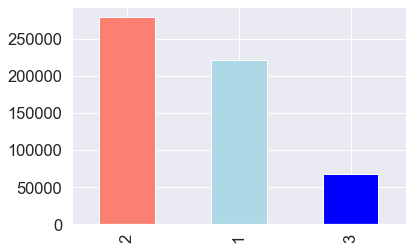

In [357]:
df["covid_res"].value_counts().plot(kind ="bar", color=["salmon", "lightblue","blue"]);

In [358]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  int64 
 2   patient_type         566602 non-null  int64 
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  int64 
 7   pneumonia            566602 non-null  int64 
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  int64 
 10  diabetes             566602 non-null  int64 
 11  copd                 566602 non-null  int64 
 12  asthma               566602 non-null  int64 
 13  inmsupr              566602 non-null  int64 
 14  hypertension         566602 non-null  int64 
 15  other_disease        566602 non-nu

In [359]:
df.isna().sum()

id                     0
sex                    0
patient_type           0
entry_date             0
date_symptoms          0
date_died              0
intubed                0
pneumonia              0
age                    0
pregnancy              0
diabetes               0
copd                   0
asthma                 0
inmsupr                0
hypertension           0
other_disease          0
cardiovascular         0
obesity                0
renal_chronic          0
tobacco                0
contact_other_covid    0
covid_res              0
icu                    0
dtype: int64

In [360]:
df.describe()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
count,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000
mean,1.506726,1.215165,76.562952,1.846262,42.622483,50.400692,2.210633,2.280221,2.265029,2.319628,2.145774,2.410030,2.286157,2.138905,2.283765,2.238360,31.573034,1.728651,76.562864
std,0.499955,0.410937,39.058676,0.560939,16.659973,47.501579,5.683523,5.327832,5.334658,5.667381,5.459866,6.489959,5.438405,5.395578,5.393232,5.571901,45.082123,0.658710,39.059060
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,97.000000,2.000000,31.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,97.000000
50%,2.000000,1.000000,97.000000,2.000000,41.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,97.000000
75%,2.000000,1.000000,97.000000,2.000000,53.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,2.000000,97.000000
max,2.000000,2.000000,99.000000,99.000000,120.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,3.000000,99.000000


In [361]:
df.drop(columns={'entry_date','date_died','date_symptoms','id'},axis=1,inplace=True)
df.shape


(566602, 19)

In [362]:

df.sex.value_counts()

2    287112
1    279490
Name: sex, dtype: int64

sex,1,2
covid_res,,
1,99858,120799
2,146736,132299
3,32896,34014


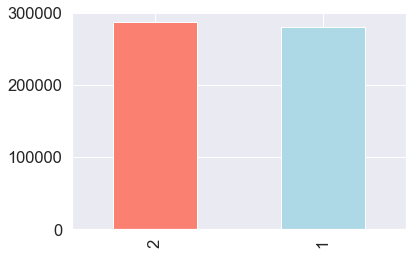

In [363]:
df.sex.value_counts().plot(kind= "bar",
                          color = ["salmon" , "lightblue"])
pd.crosstab(df.covid_res, df.sex)

TEST RESULT

1) positive
2 ) negative
3) awaitinga

replacing 1 with 1 , 2 with 0 and 3 with 2

In [364]:
df['covid_res'].replace([1,2,3],[1,0,2],inplace=True)
df['covid_res'].value_counts().to_frame()

,covid_res
0,279035
1,220657
2,66910


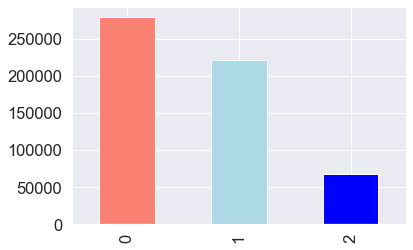

In [365]:
df["covid_res"].value_counts().plot(kind ="bar", color=["salmon", "lightblue","blue"]);




0-negative
1-positive
2-awaiting

In [366]:
df=df[df['covid_res']!=2]

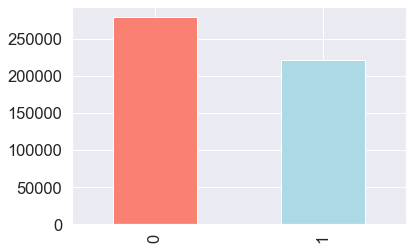

In [367]:
df["covid_res"].value_counts().plot(kind ="bar", color=["salmon", "lightblue","blue"]);

here i am dropping all those rows which contains ccovid_res is awaiting i.e.2 value

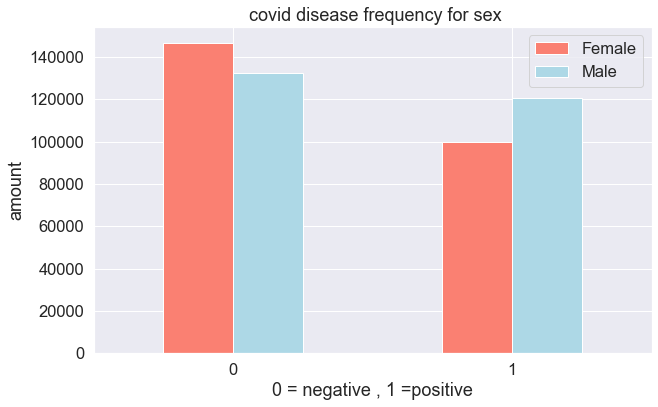

In [368]:
#creat a plot of crosstab
pd.crosstab(df.covid_res, df.sex).plot(kind = "bar",
                                   figsize=(10, 6),
                                    color=["salmon", "lightblue"])
plt.title (" covid disease frequency for sex")
plt.xlabel ("0 = negative , 1 =positive")
plt.ylabel ("amount")
plt.legend(["Female", "Male"]);
plt.xticks (rotation =0);

focusing on prediction of chances of being affected by corona virus,so here I'm dropping all those values which indicates NaN values
All those values except 1 and 2 are NaN


In [369]:

df.corr()


,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
sex,1.000000,0.098333,-0.098333,-0.054357,0.037737,0.994552,0.009137,0.010862,0.011646,0.009217,0.010245,0.011260,0.010027,0.011422,0.009995,0.006048,-0.002511,0.072825,-0.098326
patient_type,0.098333,1.000000,-0.999241,-0.411624,0.324000,0.096809,0.005049,0.017329,0.020724,0.020365,0.002691,0.033577,0.020574,0.019339,0.016951,0.020333,0.231217,0.204016,-0.999235
intubed,-0.098333,-0.999241,1.000000,0.412543,-0.323790,-0.096813,-0.005200,-0.017482,-0.020875,-0.020434,-0.002851,-0.033753,-0.020735,-0.019490,-0.017112,-0.020482,-0.231097,-0.203865,0.999988
pneumonia,-0.054357,-0.411624,0.412543,1.000000,-0.179262,-0.053689,-0.004118,-0.010641,-0.012143,-0.013025,-0.002758,-0.022032,-0.012438,-0.012100,-0.010152,-0.011768,-0.074436,-0.127431,0.412467
age,0.037737,0.324000,-0.323790,-0.179262,1.000000,0.037475,-0.002739,0.011791,0.016181,0.016444,-0.012475,0.016344,0.012625,0.009339,0.014066,0.015216,0.097757,0.167923,-0.323710
pregnancy,0.994552,0.096809,-0.096813,-0.053689,0.037475,1.000000,0.015910,0.018184,0.019048,0.016293,0.017463,0.017283,0.017257,0.018537,0.017086,0.012918,-0.003961,0.073596,-0.096806
diabetes,0.009137,0.005049,-0.005200,-0.004118,-0.002739,0.015910,1.000000,0.827140,0.836437,0.778381,0.829978,0.669706,0.808832,0.748220,0.805772,0.764150,0.004916,0.002613,-0.005168
copd,0.010862,0.017329,-0.017482,-0.010641,0.011791,0.018184,0.827140,1.000000,0.916414,0.852379,0.862561,0.731763,0.882360,0.811650,0.879197,0.831148,0.012390,0.009310,-0.017417
asthma,0.011646,0.020724,-0.020875,-0.012143,0.016181,0.019048,0.836437,0.916414,1.000000,0.875275,0.876354,0.742226,0.898938,0.825612,0.895297,0.846003,0.012971,0.011083,-0.020818
inmsupr,0.009217,0.020365,-0.020434,-0.013025,0.016444,0.016293,0.778381,0.852379,0.875275,1.000000,0.830608,0.790437,0.859473,0.784130,0.852614,0.806427,0.012583,0.010061,-0.020287


In [370]:
# df=df[(df.intubed != 97)]
# df=df[(df.intubed 

df = df.loc[(df['sex'] <= 2) & (df['intubed'] <= 2) & (df['pneumonia'] <= 2)  & (df['diabetes'] <= 2) & 
            (df['copd'] <= 2) & (df['asthma'] <= 2) & (df['inmsupr'] <= 2) & (df['hypertension'] <= 2) & 
            (df['cardiovascular'] <= 2) & (df['obesity'] <= 2) & (df['renal_chronic'] <= 2) & (df['tobacco'] <= 2) & (df['contact_other_covid'] <= 2) 
             & (df['icu'] <= 2), 
            ['sex','age','inmsupr','pneumonia','diabetes','asthma','copd','hypertension','cardiovascular',
             'renal_chronic','obesity','tobacco','contact_other_covid','covid_res','intubed','icu']]

In [371]:
df.loc[df['sex']==2,'sex']=0
df.loc[df['inmsupr']==2,'inmsupr']=0
df.loc[df['pneumonia']==2,'pneumonia']=0
df.loc[df['diabetes']==2,'diabetes']=0
df.loc[df['asthma']==2,'asthma']=0
df.loc[df['copd']==2,'copd']=0
df.loc[df['hypertension']==2,'hypertension']=0
df.loc[df['cardiovascular']==2,'cardiovascular']=0
df.loc[df['renal_chronic']==2,'renal_chronic']=0
df.loc[df['obesity']==2,'obesity']=0
df.loc[df['tobacco']==2,'tobacco']=0
df.loc[df['contact_other_covid']==2,'contact_other_covid']=0
df.loc[df['intubed']==2,'intubed']=0
df.loc[df['icu']==2,'icu']=0
# df.loc[df['pregnancy']==2,'pregnancy']=0


In [376]:
df.reset_index(drop=True,inplace=True)
df.head(10)


,sex,age,inmsupr,pneumonia,diabetes,asthma,copd,hypertension,cardiovascular,renal_chronic,obesity,tobacco,contact_other_covid,covid_res,intubed,icu
0,1,25,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,1,52,0,0,0,0,0,0,0,0,1,1,1,1,0,0
2,0,57,0,1,0,0,0,0,0,0,1,1,0,1,1,0
3,1,51,0,1,0,0,0,0,0,0,0,0,1,1,0,0
4,1,67,0,1,1,0,0,1,0,0,1,0,1,1,1,0
5,1,59,0,1,1,0,0,0,0,0,0,0,1,1,0,0
6,0,67,1,1,0,0,0,1,0,0,1,0,1,1,1,0
7,0,58,0,1,1,0,0,1,0,0,0,0,0,1,0,0
8,0,80,0,1,0,0,0,1,0,0,1,0,1,1,0,0
9,1,52,0,0,1,0,0,1,1,0,0,0,0,1,0,0


In [377]:
#make a correlation matrix

df.corr()

,sex,age,inmsupr,pneumonia,diabetes,asthma,copd,hypertension,cardiovascular,renal_chronic,obesity,tobacco,contact_other_covid,covid_res,intubed,icu
sex,1.000000,-0.027093,0.027379,-0.076469,0.026380,0.045190,0.030712,0.055699,0.017857,0.006154,0.038325,-0.123859,0.028548,-0.076964,-0.048327,-0.030450
age,-0.027093,1.000000,-0.068962,0.202815,0.275663,-0.025499,0.183350,0.360470,0.132341,0.068806,0.055890,0.060877,-0.074655,0.190502,0.049964,0.000291
inmsupr,0.027379,-0.068962,1.000000,-0.026421,-0.013391,0.026940,0.029931,-0.008235,0.051994,0.081584,-0.013374,0.010004,-0.023904,-0.098919,0.001766,0.019964
pneumonia,-0.076469,0.202815,-0.026421,1.000000,0.107069,-0.023660,0.022200,0.095159,0.015098,0.022103,0.081891,0.021537,-0.066040,0.182647,0.194153,0.118501
diabetes,0.026380,0.275663,-0.013391,0.107069,1.000000,0.001465,0.065179,0.350425,0.087871,0.158927,0.087086,0.025629,-0.058975,0.060408,0.043191,0.023345
asthma,0.045190,-0.025499,0.026940,-0.023660,0.001465,1.000000,0.051218,0.013310,0.017457,-0.002718,0.042009,0.010649,0.002917,-0.021109,-0.016058,-0.003357
copd,0.030712,0.183350,0.029931,0.022200,0.065179,0.051218,1.000000,0.100627,0.113705,0.048488,0.023050,0.124887,-0.036140,-0.063869,0.007719,0.001247
hypertension,0.055699,0.360470,-0.008235,0.095159,0.350425,0.013310,0.100627,1.000000,0.175526,0.182972,0.139038,0.026318,-0.041167,0.046409,0.038010,0.018382
cardiovascular,0.017857,0.132341,0.051994,0.015098,0.087871,0.017457,0.113705,0.175526,1.000000,0.117798,0.055689,0.048741,-0.018993,-0.051783,0.018165,0.024062
renal_chronic,0.006154,0.068806,0.081584,0.022103,0.158927,-0.002718,0.048488,0.182972,0.117798,1.000000,0.004090,0.028542,-0.042911,-0.060140,0.023158,0.010711


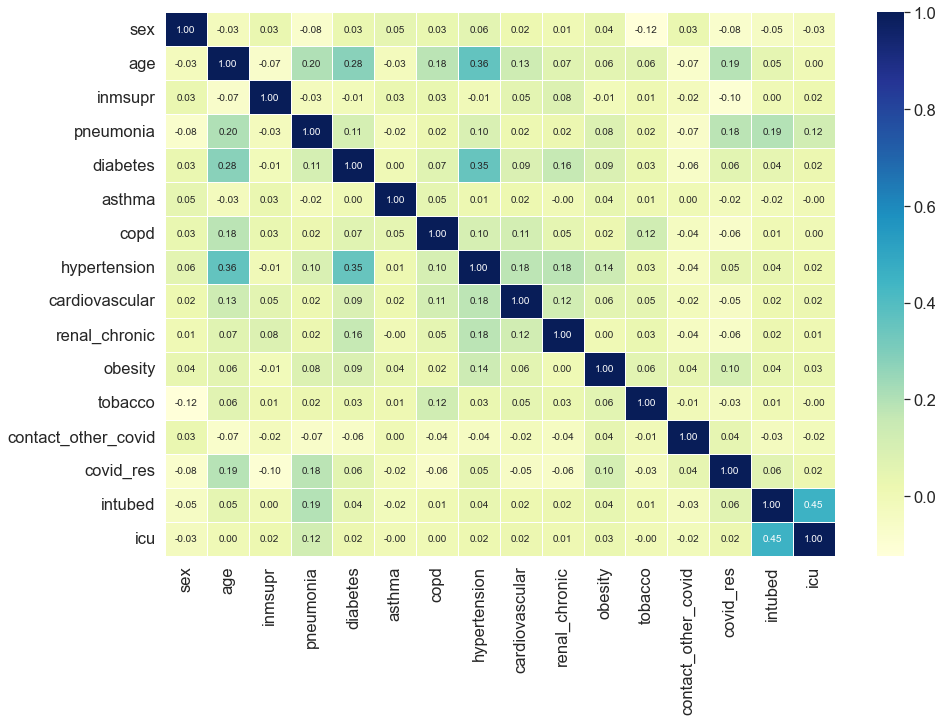

In [378]:
#let make out correlation matricx

corr_matrix = df.corr()
fig, ax = plt.subplots (figsize =(15,10))
ax= sns.heatmap (corr_matrix,
                annot =True,
                 linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

In [379]:
X =df.drop("covid_res", axis=1)

y =df["covid_res"]

In [380]:
X

,sex,age,inmsupr,pneumonia,diabetes,asthma,copd,hypertension,cardiovascular,renal_chronic,obesity,tobacco,contact_other_covid,intubed,icu
0,1,25,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,52,0,0,0,0,0,0,0,0,1,1,1,0,0
2,0,57,0,1,0,0,0,0,0,0,1,1,0,1,0
3,1,51,0,1,0,0,0,0,0,0,0,0,1,0,0
4,1,67,0,1,1,0,0,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52018,1,23,0,0,0,0,0,0,0,0,0,1,0,1,0
52019,0,42,0,0,0,0,0,0,0,0,0,1,1,0,0
52020,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1
52021,1,55,0,1,0,0,0,0,0,0,1,0,0,0,0


In [381]:
y

0        1
1        1
2        1
3        1
4        1
        ..
52018    0
52019    0
52020    0
52021    0
52022    0
Name: covid_res, Length: 52023, dtype: int64

In [382]:
#split data into train and test sets

np.random.seed(42)

X_train, X_test, y_train , y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [383]:
X_train

,sex,age,inmsupr,pneumonia,diabetes,asthma,copd,hypertension,cardiovascular,renal_chronic,obesity,tobacco,contact_other_covid,intubed,icu
5893,0,46,0,1,0,0,0,0,0,0,0,0,1,0,0
13752,0,67,0,0,1,0,0,0,0,0,0,0,0,0,0
37039,0,52,0,1,0,0,1,1,0,0,0,1,1,0,0
6350,0,70,0,1,0,0,1,0,0,0,0,0,0,0,0
21399,1,76,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0,40,0,1,0,0,0,0,0,0,0,0,0,1,1
44732,1,56,0,1,0,0,0,0,0,0,1,0,0,0,0
38158,1,28,0,1,0,0,0,0,0,0,0,0,0,0,0
860,0,80,0,0,0,0,0,1,1,1,0,0,1,0,0


In [384]:
 y_train, len (y_train)

(5893     1
 13752    1
 37039    0
 6350     1
 21399    1
         ..
 11284    1
 44732    0
 38158    0
 860      1
 15795    1
 Name: covid_res, Length: 41618, dtype: int64,
 41618)

In [385]:

# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier(),
          "Catboot":CatBoostClassifier()
         
         }


# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    
      # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

Learning rate set to 0.050625
0:	learn: 0.6838969	total: 13.3ms	remaining: 13.3s
1:	learn: 0.6757435	total: 24.3ms	remaining: 12.1s
2:	learn: 0.6684522	total: 40.1ms	remaining: 13.3s
3:	learn: 0.6615088	total: 54.7ms	remaining: 13.6s
4:	learn: 0.6551736	total: 69.4ms	remaining: 13.8s
5:	learn: 0.6496352	total: 84ms	remaining: 13.9s
6:	learn: 0.6447191	total: 98.1ms	remaining: 13.9s
7:	learn: 0.6400487	total: 112ms	remaining: 13.9s
8:	learn: 0.6359222	total: 126ms	remaining: 13.8s
9:	learn: 0.6321948	total: 141ms	remaining: 14s
10:	learn: 0.6286122	total: 157ms	remaining: 14.1s
11:	learn: 0.6255754	total: 172ms	remaining: 14.2s
12:	learn: 0.6226607	total: 191ms	remaining: 14.5s
13:	learn: 0.6206555	total: 208ms	remaining: 14.6s
14:	learn: 0.6181584	total: 225ms	remaining: 14.7s
15:	learn: 0.6161129	total: 237ms	remaining: 14.6s
16:	learn: 0.6140857	total: 252ms	remaining: 14.6s
17:	learn: 0.6121926	total: 273ms	remaining: 14.9s
18:	learn: 0.6104120	total: 285ms	remaining: 14.7s
19:	lear

161:	learn: 0.5807782	total: 2.61s	remaining: 13.5s
162:	learn: 0.5807388	total: 2.63s	remaining: 13.5s
163:	learn: 0.5806860	total: 2.65s	remaining: 13.5s
164:	learn: 0.5806309	total: 2.66s	remaining: 13.5s
165:	learn: 0.5805877	total: 2.67s	remaining: 13.4s
166:	learn: 0.5805214	total: 2.69s	remaining: 13.4s
167:	learn: 0.5804713	total: 2.7s	remaining: 13.4s
168:	learn: 0.5804124	total: 2.72s	remaining: 13.4s
169:	learn: 0.5803648	total: 2.73s	remaining: 13.3s
170:	learn: 0.5803227	total: 2.75s	remaining: 13.3s
171:	learn: 0.5803044	total: 2.76s	remaining: 13.3s
172:	learn: 0.5802752	total: 2.77s	remaining: 13.3s
173:	learn: 0.5802336	total: 2.79s	remaining: 13.2s
174:	learn: 0.5802051	total: 2.8s	remaining: 13.2s
175:	learn: 0.5801906	total: 2.82s	remaining: 13.2s
176:	learn: 0.5801792	total: 2.83s	remaining: 13.2s
177:	learn: 0.5801431	total: 2.85s	remaining: 13.1s
178:	learn: 0.5801205	total: 2.86s	remaining: 13.1s
179:	learn: 0.5800746	total: 2.87s	remaining: 13.1s
180:	learn: 0.

331:	learn: 0.5745864	total: 5.43s	remaining: 10.9s
332:	learn: 0.5745619	total: 5.45s	remaining: 10.9s
333:	learn: 0.5745345	total: 5.46s	remaining: 10.9s
334:	learn: 0.5744831	total: 5.48s	remaining: 10.9s
335:	learn: 0.5744516	total: 5.5s	remaining: 10.9s
336:	learn: 0.5744015	total: 5.51s	remaining: 10.8s
337:	learn: 0.5743571	total: 5.53s	remaining: 10.8s
338:	learn: 0.5743382	total: 5.54s	remaining: 10.8s
339:	learn: 0.5743163	total: 5.56s	remaining: 10.8s
340:	learn: 0.5742873	total: 5.57s	remaining: 10.8s
341:	learn: 0.5742415	total: 5.59s	remaining: 10.8s
342:	learn: 0.5742285	total: 5.6s	remaining: 10.7s
343:	learn: 0.5741911	total: 5.62s	remaining: 10.7s
344:	learn: 0.5741704	total: 5.63s	remaining: 10.7s
345:	learn: 0.5741249	total: 5.65s	remaining: 10.7s
346:	learn: 0.5740921	total: 5.67s	remaining: 10.7s
347:	learn: 0.5740714	total: 5.68s	remaining: 10.6s
348:	learn: 0.5740328	total: 5.7s	remaining: 10.6s
349:	learn: 0.5740028	total: 5.71s	remaining: 10.6s
350:	learn: 0.5

498:	learn: 0.5693161	total: 8.29s	remaining: 8.32s
499:	learn: 0.5692950	total: 8.3s	remaining: 8.3s
500:	learn: 0.5692586	total: 8.32s	remaining: 8.28s
501:	learn: 0.5692346	total: 8.33s	remaining: 8.26s
502:	learn: 0.5692060	total: 8.34s	remaining: 8.24s
503:	learn: 0.5691918	total: 8.35s	remaining: 8.22s
504:	learn: 0.5691795	total: 8.37s	remaining: 8.2s
505:	learn: 0.5691512	total: 8.38s	remaining: 8.18s
506:	learn: 0.5691171	total: 8.39s	remaining: 8.16s
507:	learn: 0.5691005	total: 8.4s	remaining: 8.14s
508:	learn: 0.5690828	total: 8.42s	remaining: 8.12s
509:	learn: 0.5690746	total: 8.44s	remaining: 8.11s
510:	learn: 0.5690379	total: 8.46s	remaining: 8.09s
511:	learn: 0.5689973	total: 8.48s	remaining: 8.09s
512:	learn: 0.5689633	total: 8.5s	remaining: 8.07s
513:	learn: 0.5689293	total: 8.52s	remaining: 8.05s
514:	learn: 0.5689085	total: 8.54s	remaining: 8.04s
515:	learn: 0.5688877	total: 8.55s	remaining: 8.02s
516:	learn: 0.5688712	total: 8.57s	remaining: 8.01s
517:	learn: 0.568

659:	learn: 0.5652236	total: 10.6s	remaining: 5.47s
660:	learn: 0.5652075	total: 10.6s	remaining: 5.45s
661:	learn: 0.5651736	total: 10.6s	remaining: 5.44s
662:	learn: 0.5651347	total: 10.7s	remaining: 5.42s
663:	learn: 0.5651107	total: 10.7s	remaining: 5.4s
664:	learn: 0.5650865	total: 10.7s	remaining: 5.38s
665:	learn: 0.5650676	total: 10.7s	remaining: 5.37s
666:	learn: 0.5650458	total: 10.7s	remaining: 5.36s
667:	learn: 0.5650237	total: 10.8s	remaining: 5.34s
668:	learn: 0.5649960	total: 10.8s	remaining: 5.33s
669:	learn: 0.5649770	total: 10.8s	remaining: 5.32s
670:	learn: 0.5649371	total: 10.8s	remaining: 5.3s
671:	learn: 0.5648992	total: 10.8s	remaining: 5.29s
672:	learn: 0.5648858	total: 10.9s	remaining: 5.28s
673:	learn: 0.5648522	total: 10.9s	remaining: 5.26s
674:	learn: 0.5648282	total: 10.9s	remaining: 5.25s
675:	learn: 0.5648000	total: 10.9s	remaining: 5.23s
676:	learn: 0.5647731	total: 10.9s	remaining: 5.22s
677:	learn: 0.5647307	total: 10.9s	remaining: 5.2s
678:	learn: 0.5

818:	learn: 0.5615449	total: 13.4s	remaining: 2.97s
819:	learn: 0.5615199	total: 13.5s	remaining: 2.96s
820:	learn: 0.5614960	total: 13.5s	remaining: 2.95s
821:	learn: 0.5614797	total: 13.6s	remaining: 2.94s
822:	learn: 0.5614524	total: 13.6s	remaining: 2.92s
823:	learn: 0.5614386	total: 13.6s	remaining: 2.91s
824:	learn: 0.5614190	total: 13.7s	remaining: 2.9s
825:	learn: 0.5614062	total: 13.7s	remaining: 2.88s
826:	learn: 0.5613899	total: 13.7s	remaining: 2.87s
827:	learn: 0.5613805	total: 13.8s	remaining: 2.86s
828:	learn: 0.5613726	total: 13.8s	remaining: 2.85s
829:	learn: 0.5613610	total: 13.9s	remaining: 2.84s
830:	learn: 0.5613465	total: 13.9s	remaining: 2.83s
831:	learn: 0.5613344	total: 13.9s	remaining: 2.81s
832:	learn: 0.5612997	total: 13.9s	remaining: 2.79s
833:	learn: 0.5612692	total: 14s	remaining: 2.79s
834:	learn: 0.5612560	total: 14s	remaining: 2.77s
835:	learn: 0.5612252	total: 14.1s	remaining: 2.76s
836:	learn: 0.5612016	total: 14.1s	remaining: 2.74s
837:	learn: 0.561

980:	learn: 0.5583965	total: 17.1s	remaining: 331ms
981:	learn: 0.5583759	total: 17.1s	remaining: 314ms
982:	learn: 0.5583581	total: 17.2s	remaining: 297ms
983:	learn: 0.5583469	total: 17.2s	remaining: 280ms
984:	learn: 0.5583403	total: 17.3s	remaining: 263ms
985:	learn: 0.5583130	total: 17.3s	remaining: 246ms
986:	learn: 0.5582945	total: 17.3s	remaining: 228ms
987:	learn: 0.5582704	total: 17.4s	remaining: 211ms
988:	learn: 0.5582506	total: 17.4s	remaining: 193ms
989:	learn: 0.5582480	total: 17.4s	remaining: 176ms
990:	learn: 0.5582340	total: 17.4s	remaining: 158ms
991:	learn: 0.5582192	total: 17.5s	remaining: 141ms
992:	learn: 0.5582031	total: 17.5s	remaining: 123ms
993:	learn: 0.5581894	total: 17.5s	remaining: 106ms
994:	learn: 0.5581734	total: 17.5s	remaining: 88.1ms
995:	learn: 0.5581631	total: 17.5s	remaining: 70.5ms
996:	learn: 0.5581508	total: 17.6s	remaining: 52.9ms
997:	learn: 0.5581397	total: 17.6s	remaining: 35.2ms
998:	learn: 0.5581302	total: 17.6s	remaining: 17.6ms
999:	le

{'KNN': 0.6486304661220567,
 'Logistic Regression': 0.6809226333493513,
 'Random Forest': 0.6512253724171072,
 'Catboot': 0.6936088419029313}

In [386]:
# print(model.get_best_iteration())

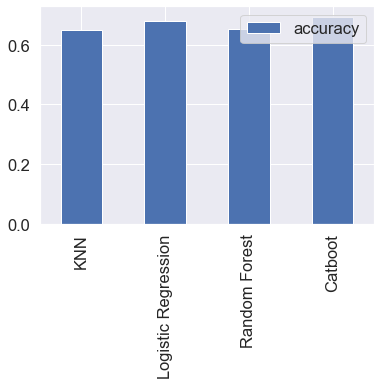

In [387]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

In [388]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

In [389]:
train_scores

[0.7465760007688981,
 0.671007737036859,
 0.727281464750829,
 0.7036378490076409,
 0.7218991782401846,
 0.7132971310490653,
 0.7188235859483877,
 0.7126243452352348,
 0.7143063097698111,
 0.711254745542794,
 0.7125282329761161,
 0.7114229419962517,
 0.7104618194050651,
 0.7089961074535057,
 0.7087317987409294,
 0.7086356864818107,
 0.7066413571050988,
 0.7070978903359123,
 0.7052237012830986,
 0.7043586909510308]

Maximum KNN score on the test data: 68.27%


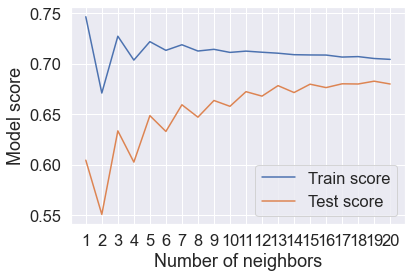

In [390]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

In [391]:

# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [392]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [393]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 4.281332398719396}

In [394]:
rs_log_reg.score(X_test, y_test)

0.6807304180682364

In [395]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [396]:

# Find the best parameters
rs_rf.best_params_

{'n_estimators': 260,
 'min_samples_split': 8,
 'min_samples_leaf': 19,
 'max_depth': None}

In [397]:

# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

0.6969726093224411

In [398]:

# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [399]:

# Check the best parameters
gs_log_reg.best_params_

{'C': 4.281332398719396, 'solver': 'liblinear'}

In [400]:

# Evaluate the model
gs_log_reg.score(X_test, y_test)

0.6807304180682364

In [401]:
# Make preidctions on test data
y_preds = gs_log_reg.predict(X_test)

In [402]:
y_preds

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [403]:
y_test

18621    1
40571    0
29915    1
49783    0
19375    1
        ..
10592    1
22498    1
44063    0
18266    1
50252    0
Name: covid_res, Length: 10405, dtype: int64

A:\miniconda3\envs\ai\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


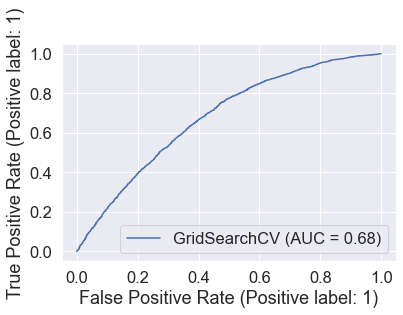

In [404]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test);

In [405]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[1316 2535]
 [ 787 5767]]


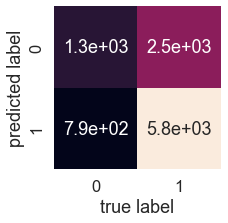

In [406]:

# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

In [407]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.63      0.34      0.44      3851
           1       0.69      0.88      0.78      6554

    accuracy                           0.68     10405
   macro avg       0.66      0.61      0.61     10405
weighted avg       0.67      0.68      0.65     10405



In [408]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 4.281332398719396, 'solver': 'liblinear'}

In [409]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

In [410]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.68976454, 0.68957232, 0.67813551, 0.69050365, 0.68886967])

In [411]:
cv_acc = np.mean(cv_acc)
cv_acc

0.6873691374015944

In [412]:

# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.6983786178467792

In [413]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.8875137360084162

In [414]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.781661327725098

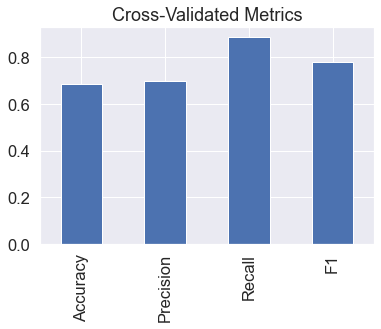

In [415]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

In [416]:
# Fit an instance of LogisticRegression (taken from above)
clf.fit(X_train, y_train);

In [417]:
# Check coef_
clf.coef_

array([[-0.30056307,  0.02071137, -0.7258804 ,  0.63951546,  0.09127894,
        -0.10970625, -0.88053175, -0.0930532 , -0.56297731, -0.594593  ,
         0.50881878, -0.3391222 ,  0.29873595,  0.17599309, -0.01453807]])

In [425]:
df=X

In [426]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'sex': -0.3005630734746901,
 'age': 0.02071136525461373,
 'inmsupr': -0.7258804016206734,
 'pneumonia': 0.6395154576257235,
 'diabetes': 0.09127894464592018,
 'asthma': -0.10970625007718023,
 'copd': -0.8805317500740747,
 'hypertension': -0.09305320039049826,
 'cardiovascular': -0.5629773148752076,
 'renal_chronic': -0.5945930045898064,
 'obesity': 0.5088187759102588,
 'tobacco': -0.33912220496711004,
 'contact_other_covid': 0.29873595221807725,
 'intubed': 0.17599308538000216,
 'icu': -0.014538066412947272}

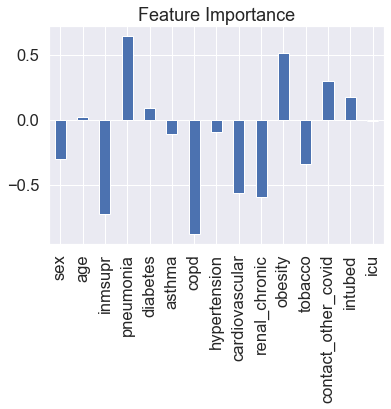

In [427]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

In [428]:
LogisticRegression()

LogisticRegression()

In [429]:
import pickle
from joblib import dump, load
s = dump(clf,"model1.joblib")


LogisticRegression() 68% prediction is accurate for being known whether you are in danger or not from being affected by covid-19.

In [430]:
# clf2 = pickle.loads(s)
# clf2.predict(X_test)